# Import & Data check

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
from IPython.display import Image
from collections import Counter

plt.style.use('seaborn')
sns.set(font_scale=1.5)

import missingno as msno # 누락된 데이터에 대한 시각화

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [54]:
df_train = pd.read_csv("C:/Users/82102/House Prices/train.csv")
df_test = pd.read_csv("C:/Users/82102/House Prices/test.csv")

### 데이터 확인

In [55]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
df_train.shape, df_test.shape

# train 데이터는 1460개의 데이터와 81개의 feature
# test 데이터는 1459개의 데이터와 80개의 feature

((1460, 81), (1459, 80))

In [57]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

# 수치형 변수는 38개, 명목형 변수는 43개

Number of Numerical features:  38
Number of Categorical features:  43


In [58]:
print(df_train[numerical_feats].columns)
print("*"*80)
print(df_train[categorical_feats].columns)

# 수치형 변수명, 명목형 변수명 확인

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
********************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual'

### 이상치 탐색 및 제거
사분의 값의 편차를 이용하는 방법 사용
-> IQR값 구하고 (Q3 + 1.5IQR)을 최댓값, (Q1 - 1.5IQR)을 최솟값으로 하여 그 이외의 수를 탐색

In [59]:
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    # n개보다 많은 이상치를 가지고 있는 것 선택
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
        
    return multiple_outliers


# 수치형 데이터에 대해 사용
Outliers_to_drop = detect_outliers(df_train, 2, ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'])


# 이상치가 발견된 행 확인
df_train.loc[Outliers_to_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
634,635,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
910,911,90,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,154300
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,107500


In [60]:
# 이상치를 제거해줌
df_train = df_train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

### 결측치 확인

In [61]:
# train 데이터에서 각 column의 결측치가 몇 %인지 확인

for col in df_train.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msperc)  

column:         Id	 Percent of NaN value: 0.00%
column: MSSubClass	 Percent of NaN value: 0.00%
column:   MSZoning	 Percent of NaN value: 0.00%
column: LotFrontage	 Percent of NaN value: 17.12%
column:    LotArea	 Percent of NaN value: 0.00%
column:     Street	 Percent of NaN value: 0.00%
column:      Alley	 Percent of NaN value: 94.10%
column:   LotShape	 Percent of NaN value: 0.00%
column: LandContour	 Percent of NaN value: 0.00%
column:  Utilities	 Percent of NaN value: 0.00%
column:  LotConfig	 Percent of NaN value: 0.00%
column:  LandSlope	 Percent of NaN value: 0.00%
column: Neighborhood	 Percent of NaN value: 0.00%
column: Condition1	 Percent of NaN value: 0.00%
column: Condition2	 Percent of NaN value: 0.00%
column:   BldgType	 Percent of NaN value: 0.00%
column: HouseStyle	 Percent of NaN value: 0.00%
column: OverallQual	 Percent of NaN value: 0.00%
column: OverallCond	 Percent of NaN value: 0.00%
column:  YearBuilt	 Percent of NaN value: 0.00%
column: YearRemodAdd	 Percent of

In [62]:
# train 데이터에서 각 column의 결측치가 몇 %인지 확인

for col in df_test.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msperc)

column:         Id	 Percent of NaN value: 0.00%
column: MSSubClass	 Percent of NaN value: 0.00%
column:   MSZoning	 Percent of NaN value: 0.27%
column: LotFrontage	 Percent of NaN value: 15.56%
column:    LotArea	 Percent of NaN value: 0.00%
column:     Street	 Percent of NaN value: 0.00%
column:      Alley	 Percent of NaN value: 92.67%
column:   LotShape	 Percent of NaN value: 0.00%
column: LandContour	 Percent of NaN value: 0.00%
column:  Utilities	 Percent of NaN value: 0.14%
column:  LotConfig	 Percent of NaN value: 0.00%
column:  LandSlope	 Percent of NaN value: 0.00%
column: Neighborhood	 Percent of NaN value: 0.00%
column: Condition1	 Percent of NaN value: 0.00%
column: Condition2	 Percent of NaN value: 0.00%
column:   BldgType	 Percent of NaN value: 0.00%
column: HouseStyle	 Percent of NaN value: 0.00%
column: OverallQual	 Percent of NaN value: 0.00%
column: OverallCond	 Percent of NaN value: 0.00%
column:  YearBuilt	 Percent of NaN value: 0.00%
column: YearRemodAdd	 Percent of

그래프를 통해 직관적으로 확인해보면,

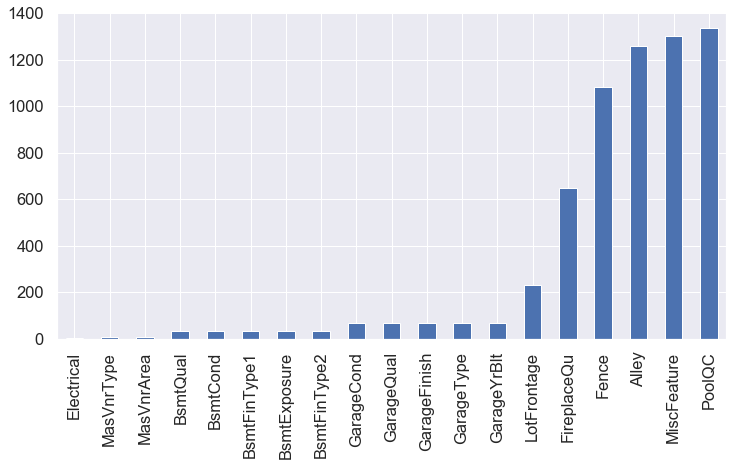

In [63]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True) # 데이터 정렬
missing.plot.bar(figsize = (12,6))

### Skewness(비대칭도) 확인
비대칭도는 수치가 0 일때 정규분포를 따르고 0보다 작을 시 오른쪽으로 치우치고 0보다 클 시 왼쪽으로 치우침

첨도는 수치가 3일때 정규분포, 3보다 작을 시 더 완만하고 3보다 클 시 더 뾰족함

In [64]:
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df_train[col].skew()) , # 비대칭도
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_train[col].kurt())  # 첨도
         )

Id              Skewness: 00.00     Kurtosis: -01.19
MSSubClass      Skewness: 01.37     Kurtosis: 001.49
LotFrontage     Skewness: 01.59     Kurtosis: 013.04
LotArea         Skewness: 07.78     Kurtosis: 123.55
OverallQual     Skewness: 00.16     Kurtosis: -00.05
OverallCond     Skewness: 00.74     Kurtosis: 001.23
YearBuilt       Skewness: -0.58     Kurtosis: -00.60
YearRemodAdd    Skewness: -0.52     Kurtosis: -01.27
MasVnrArea      Skewness: 02.69     Kurtosis: 011.04
BsmtFinSF1      Skewness: 00.65     Kurtosis: -00.50
BsmtFinSF2      Skewness: 04.86     Kurtosis: 026.86
BsmtUnfSF       Skewness: 00.87     Kurtosis: 000.29
TotalBsmtSF     Skewness: 00.29     Kurtosis: 001.17
1stFlrSF        Skewness: 00.66     Kurtosis: 000.02
2ndFlrSF        Skewness: 00.77     Kurtosis: -00.80
LowQualFinSF    Skewness: 12.74     Kurtosis: 170.50
GrLivArea       Skewness: 00.66     Kurtosis: 000.54
BsmtFullBath    Skewness: 00.56     Kurtosis: -00.96
BsmtHalfBath    Skewness: 04.91     Kurtosis: 

# EDA (Exploratory Data Analysis) 탐색적 데이터 분석

## - 수치형 데이터

### Correlation Heat Map

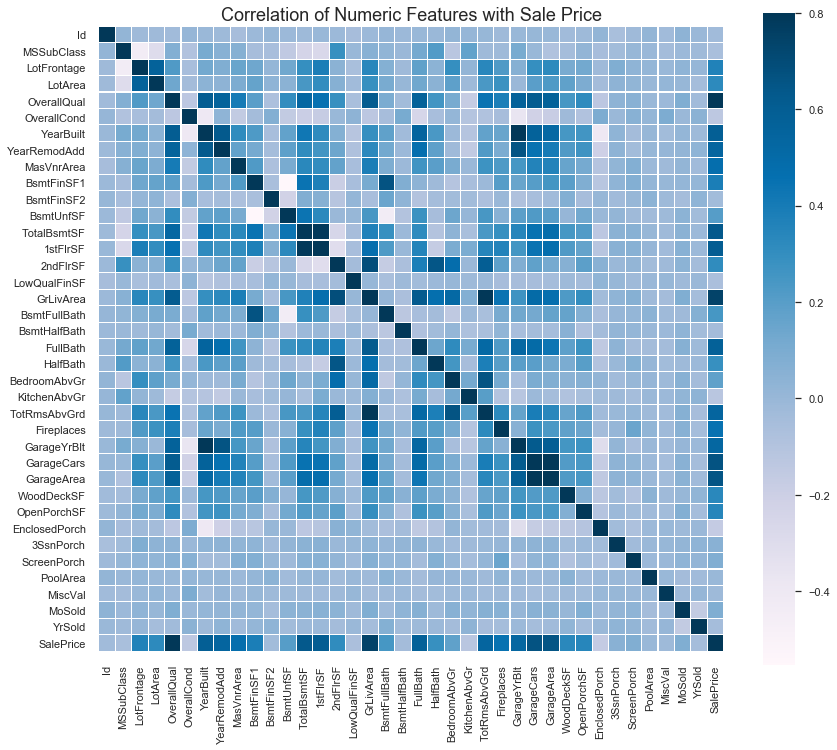

In [65]:
corr_data = df_train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                      'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

colormap = plt.cm.PuBu       # 그래프 색깔 설정
sns.set(font_scale=1.0)

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=18)
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.1,
            cmap = colormap, linecolor = "white", vmax=0.8)



heat map을 통해 변수 간 상관관계를 알 수 있고, 다중공선성(MultiColarisity) 감지

다중 공선성은 변수간 상관관계가 강할 때 나타남 → 부정확한 예측을 하게될 가능성 존재

- 'TotalBsmtSF'와 '1stFlrSF' 변수의 관계
- 'TotRmsAbvGrd'와 'GrLivArea' 변수의 관계
- 'Garage'와 관련한 변수들 사이의 관계

위의 네가지 경우에서 강한 상관관계를 나타냄 → 다중공선성 나타난다고 볼 수 있음

*** 'SalePrice'와 다른 변수들의 상관관계도 확인해볼 필요 있음 ('GrLivArea', 'TotalBsmtSF', 'OverallQual'이 큰 관계를 보임)

### Zoomed Heat Map

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd',
       'YearRemodAdd'],
      dtype='object')


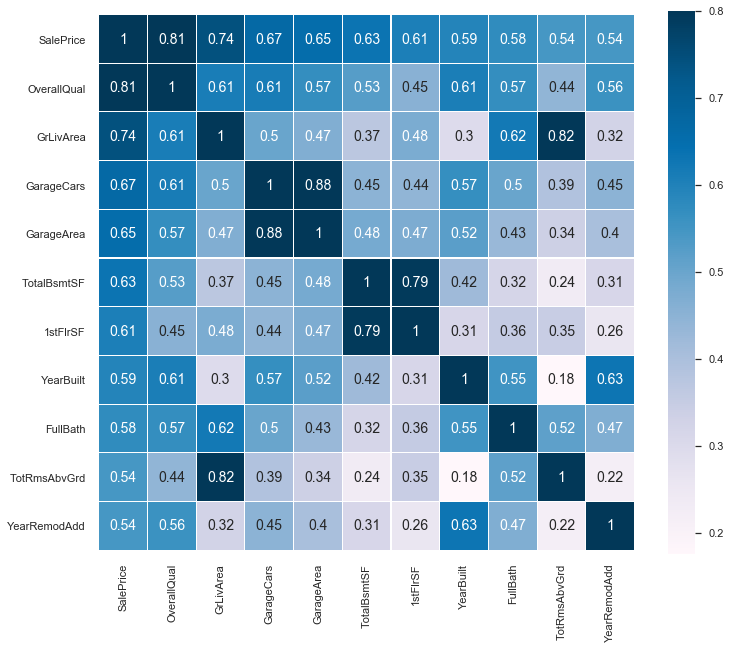

In [66]:
k= 11
cols = corr_data.corr().nlargest(k,'SalePrice')['SalePrice'].index # 'SakePrice'와 강한 상관관계를 나타내는 11개의 column 추림

print(cols)

cm = np.corrcoef(df_train[cols].values.T) # 상관계수
f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':14},yticklabels = cols.values)

- Target feature와 가장 밀접한 연관이 있는 feature는 'OverallQual', 'GrLivArea'및 'TotalBsmtSF'로 보임


- 먼저 말했던 GarageCars와 GarageArea, TotalBsmtSF와 1stFlrSF, TotRmsAbvGrd와 GrLivArea는 모두 매우 유사한 정보를 포함하고 있으며 다중공선성이 나타난다고 할 수 있음  → 이중에서 SalePrice와 더 연관되어있는 변수인 GarageCars와 TotalBsmtSF, GrLivArea를 남기고 나머지는 이후에 버리도록 함

    

### Pair Plot

위의 Zoomed Heat Map에서 다중공선성을 보이는 변수 중 SalePrice와 연관이 덜 한 변수를 제외하고 그림

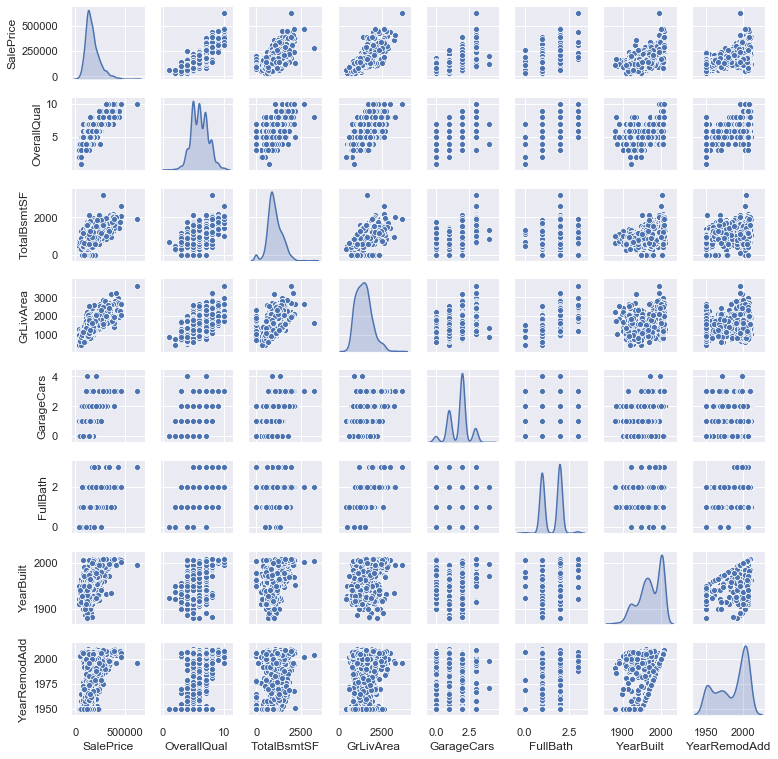

In [67]:
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(df_train[columns],size = 1.3 ,kind ='scatter',diag_kind='kde')
plt.show()

- 'TotalBsmtSF'와 'GrLiveArea'는 각각 지하실의 면적과 생활공간 면적을 의미하는데, plot을 보면 점들이 직선처럼 그려지고 대부분의 점은 해당 선 아래에 유지되는 것을 볼 수 있음 →
이것은 일반적으로 지하실 면적이 지상 생활 면적과 같을 수 있지만, 더 크진 않기 때문에 보여지는 특징이라고 할 수 있음


- 'SalePrice'와 'YearBuilt'의 plot을 보면 우상향 곡선을 보이는데, 이는 전년도 대비 주택 가격 상승의 가속을 의미한다고 할 수 있음


### Scatter Plot

'SalePrice'와 가장 밀접한 연관이 있다고 판단됐던 변수들의 Scatter Plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


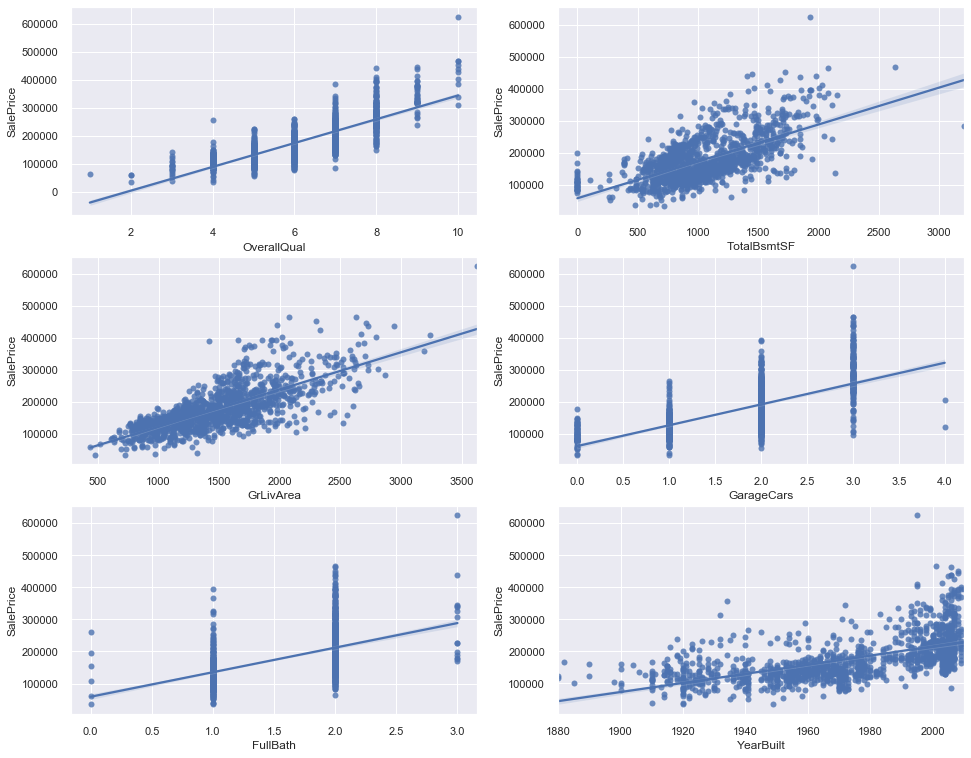

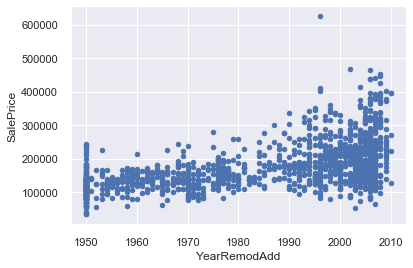

In [68]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16,13))

OverallQual_scatter_plot = pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis = 1)
sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
TotalBsmtSF_scatter_plot = pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
GrLivArea_scatter_plot = pd.concat([df_train['SalePrice'],df_train['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
GarageCars_scatter_plot = pd.concat([df_train['SalePrice'],df_train['GarageCars']],axis = 1)
sns.regplot(x='GarageCars',y = 'SalePrice',data = GarageCars_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
FullBath_scatter_plot = pd.concat([df_train['SalePrice'],df_train['FullBath']],axis = 1)
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearBuilt_scatter_plot = pd.concat([df_train['SalePrice'],df_train['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6)
YearRemodAdd_scatter_plot = pd.concat([df_train['SalePrice'],df_train['YearRemodAdd']],axis = 1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')


OverallQual, GarageCars, Fullbath와 같은 변수들은범주형 데이터의 특징을 보임 (등급, 갯수 등을 의미하기 때문)

## - 범주형 데이터 

In [69]:
for catg in list(categorical_feats) :
    print(df_train[catg].value_counts())
    print('#'*50)
    

RL         1055
RM          197
FV           65
RH           14
C (all)       7
Name: MSZoning, dtype: int64
##################################################
Pave    1335
Grvl       3
Name: Street, dtype: int64
##################################################
Grvl    42
Pave    37
Name: Alley, dtype: int64
##################################################
Reg    859
IR1    440
IR2     32
IR3      7
Name: LotShape, dtype: int64
##################################################
Lvl    1211
Bnk      52
HLS      48
Low      27
Name: LandContour, dtype: int64
##################################################
AllPub    1338
Name: Utilities, dtype: int64
##################################################
Inside     972
Corner     235
CulDSac     81
FR2         46
FR3          4
Name: LotConfig, dtype: int64
##################################################
Gtl    1275
Mod      56
Sev       7
Name: LandSlope, dtype: int64
##################################################
NAmes      20

## Box plot

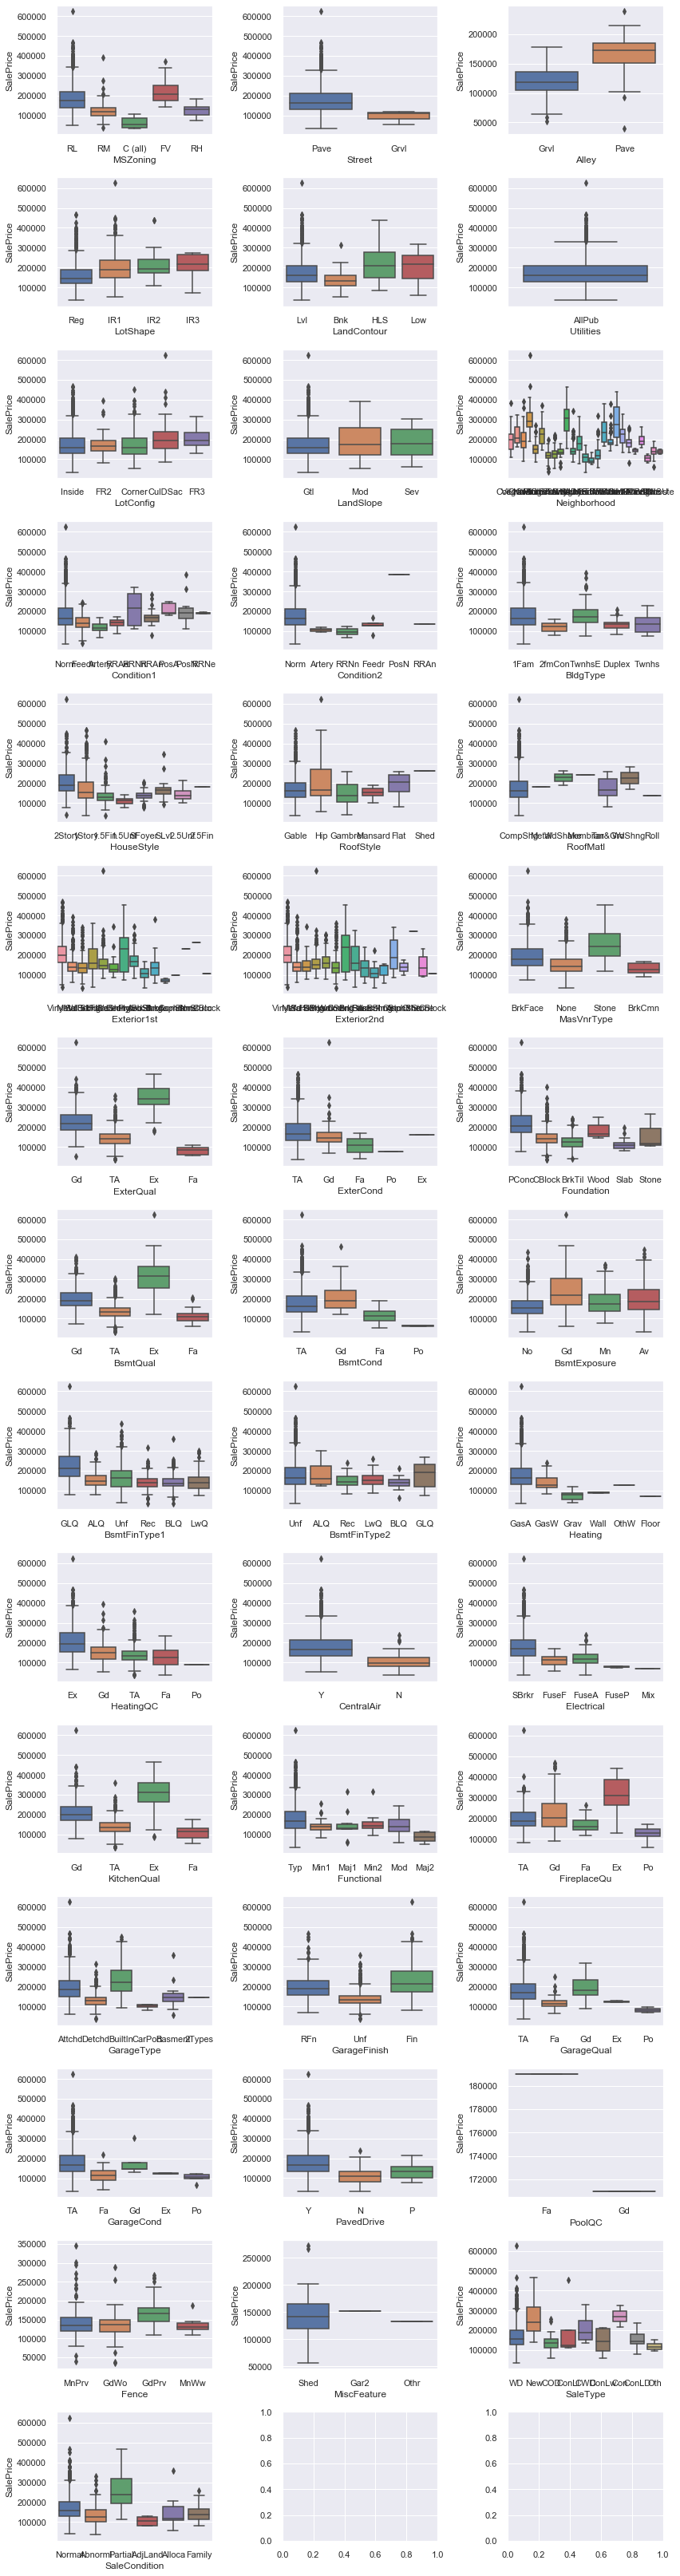

In [70]:
li_cat_feats = list(categorical_feats) # feature를 리스트화함
nr_rows = 15
nr_cols = 3

# 15행 3열의 그래프 그림
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=df_train["SalePrice"], data=df_train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()

Neighborhood, SaleType 변수는 가격 편차가 상대적으로 크므로 영향이 크다고 생각됨

정리하면 SalePrice에 영향을 많이 끼치는 변수로는 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType' 등이 있음

In [71]:
# SalePrice와 관련이 큰 변수와 아닌 변수를 분리

num_strong_corr = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars',
                   'FullBath','YearBuilt','YearRemodAdd']

num_weak_corr = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'BsmtFullBath',
                 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

catg_strong_corr = ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
                    'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

# Feature Engineering

### - log 변환

Skewness: 1.287364
Kurtosis: 2.555029


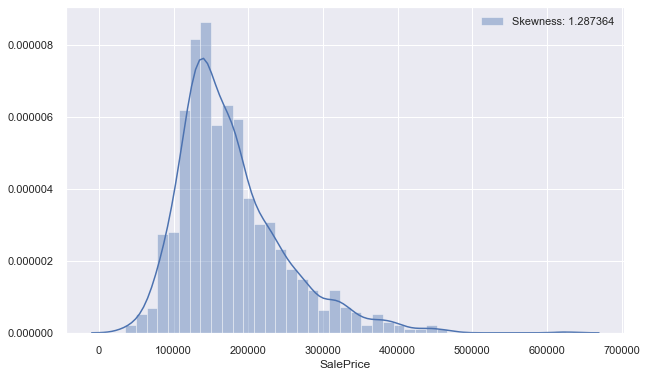

In [72]:
# SalePrice

f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(df_train["SalePrice"], color = "b", label="Skewness: {:2f}".format(df_train["SalePrice"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness: %f" % df_train["SalePrice"].skew())
print("Kurtosis: %f" % df_train["SalePrice"].kurt())

그래프와 수치를 확인하면 정상적으로 분포되지 않는것을 확인할 수 있음 → 예측의 정확도를 높히기 위해 로그 변환을 수행(정규 근사화)

Skewness: -0.032026
Kurtosis: 0.571897


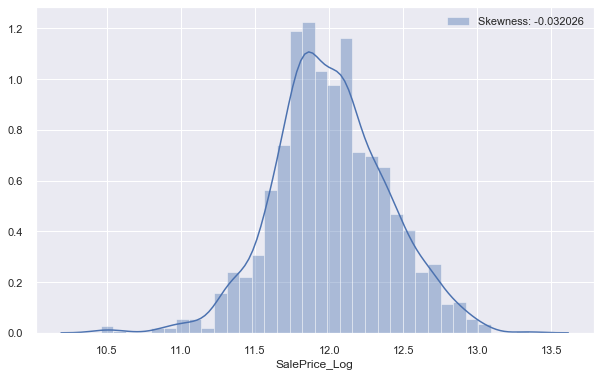

In [73]:
# 새로운 feature "SalePrice_Log"를 만듬
df_train["SalePrice_Log"] = df_train["SalePrice"].map(lambda i:np.log(i) if i>0 else 0)

f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(df_train["SalePrice_Log"], color = "b", label="Skewness: {:2f}".format(df_train["SalePrice_Log"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness: %f" % df_train['SalePrice_Log'].skew())
print("Kurtosis: %f" % df_train['SalePrice_Log'].kurt())

# 기존의 'SalePrice'는 버림
df_train.drop('SalePrice', axis= 1, inplace=True)


데이터 확인 과정에서 비대칭도와 첨도가 정상적으로 분포되지 않은 변수들이 있었으나, EDA 과정에서 중요하다고 판단되었던 Numerical feature들은 비대칭도와 첨도가 수치적으로 보이지 않으므로 Target Feature인 SalePrice만 Log를 취함

### - 결측치 처리

현재 이 문제에서는 결측치가 상당히 많이 있었는데, 이 중에서는 NaN값의 의미가 단순이 측청되지 않음을 의미하는 것이 아니라 있다, 없다 개념으로 사용되는 경우도 있음.
이러한 변수들의 특징을 파악하여 결측 데이터를 처리해줌.

In [74]:
# 없다의 의미를 갖는 변수

cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# NaN을 없다는 의미의 None으로 대체
for col in cols_fillna:
    df_train[col].fillna('None',inplace=True)
    df_test[col].fillna('None',inplace=True)

In [75]:
# 결측치의 처리정도 확인

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,229,0.171151
GarageYrBlt,65,0.048580
MasVnrArea,7,0.005232
SalePrice_Log,0,0.000000
ExterCond,0,0.000000


In [76]:
# 나머지 결측치들은 평균값으로 대체

df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

### - SalePrice와 상관관계가 약한 column 삭제

In [77]:
id_test = df_test['Id']

to_drop_num  = num_weak_corr
to_drop_catg = catg_weak_corr

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg 

for df in [df_train, df_test]:
    df.drop(cols_to_drop, inplace= True, axis = 1)

### - 범주형 데이터 수치형으로 변환
EDA과정의 Boxplot에서 보았던 SalePrice에 영향이 큰 변수들을 변환

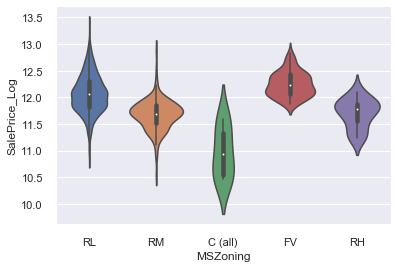

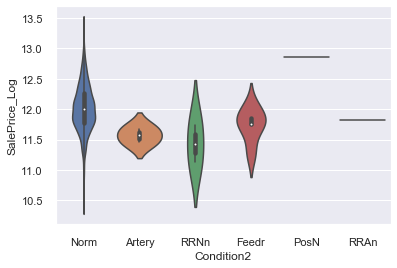

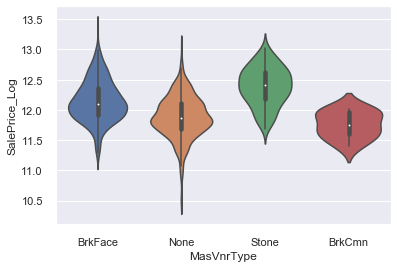

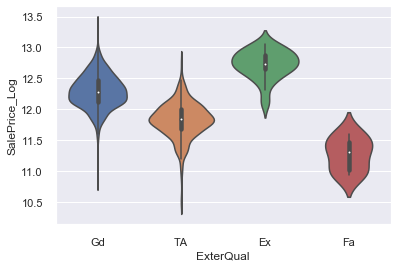

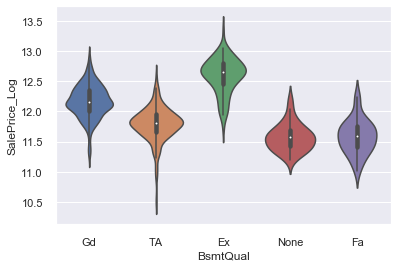

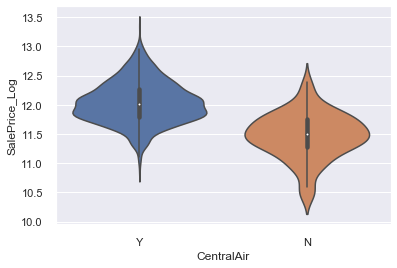

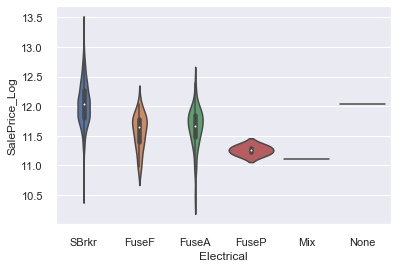

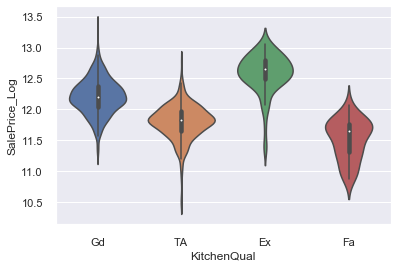

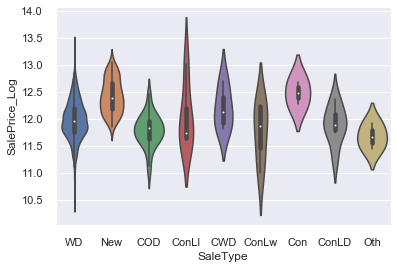

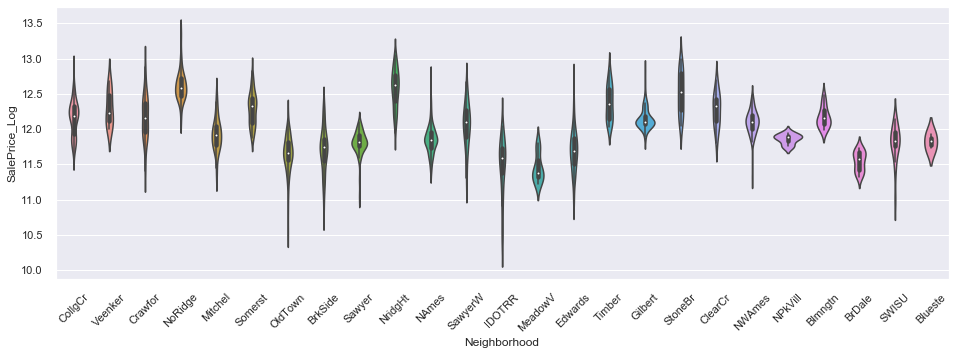

In [78]:
# ViolinPlot을 통해 각 범주들과 SalePrice의 관계를 살펴봄

catg_list = catg_strong_corr.copy()
catg_list.remove('Neighborhood')

for catg in catg_list :
    sns.violinplot(x=catg, y=df_train["SalePrice_Log"], data=df_train)
    plt.show()

    
# 범주의 개수가 많은 Neighborhood 변수는 따로 살펴봄
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=df_train["SalePrice_Log"], data=df_train, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [79]:
# 각 범주들에 해당되는 SalePrice_Log 평균을 살펴봄

for catg in catg_list :
    g = df_train.groupby(catg)["SalePrice_Log"].mean()
    print(g)
    

MSZoning
C (all)    10.960733
FV         12.246616
RH         11.700602
RL         12.069474
RM         11.677434
Name: SalePrice_Log, dtype: float64
Condition2
Artery    11.570036
Feedr     11.734675
Norm      12.012766
PosN      12.860999
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_Log, dtype: float64
MasVnrType
BrkCmn     11.757397
BrkFace    12.150038
None       11.884715
Stone      12.391766
Name: SalePrice_Log, dtype: float64
ExterQual
Ex    12.727937
Fa    11.274881
Gd    12.295102
TA    11.828332
Name: SalePrice_Log, dtype: float64
BsmtQual
Ex      12.595497
Fa      11.585725
Gd      12.170320
None    11.572903
TA      11.791989
Name: SalePrice_Log, dtype: float64
CentralAir
N    11.471479
Y    12.042717
Name: SalePrice_Log, dtype: float64
Electrical
FuseA    11.641350
FuseF    11.565700
FuseP    11.256345
Mix      11.112448
None     12.028739
SBrkr    12.047595
Name: SalePrice_Log, dtype: float64
KitchenQual
Ex    12.582467
Fa    11.514567
Gd    12.209558
TA    11.

Violinplot과 SalePrice_Log 평균을 참고하여 각 변수들의 범주들을 그룹화

In [80]:
# 'MSZoning'
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 


# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']

수치형 변환 실행

In [81]:

for df in [df_train, df_test]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
    
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4 
    


Heat Map ( 새로 만들어진 numerical feature )

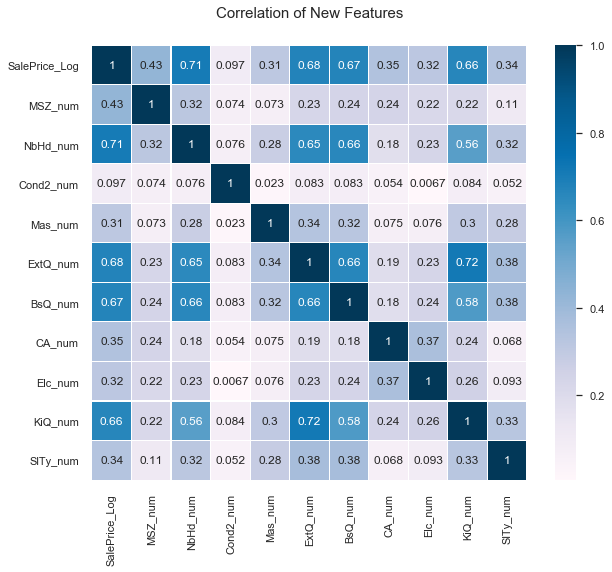

In [82]:
new_col_HM = df_train[['SalePrice_Log', 'MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']]

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of New Features", y = 1.05, size = 15)
sns.heatmap(new_col_HM.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 12})

NbHd_num, ExtQ_num, BsQ_num, KiQ_num를 제외하고는 SalePrice_Log와 큰 상관관계가있는 열은 거의 없음

In [83]:
# 기존 범주형 변수와 새로 만들어진 수치형 변수 중 유의하지 않은 것 삭제

df_train.drop(['MSZoning','Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType', 'Cond2_num', 'Mas_num', 'CA_num', 'Elc_num', 'SlTy_num'], axis = 1, inplace = True)
df_test.drop(['MSZoning', 'Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType', 'Cond2_num', 'Mas_num', 'CA_num', 'Elc_num', 'SlTy_num'], axis = 1, inplace = True)


### 확인

In [84]:
df_train.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice_Log,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,7,2003,2003,856,1710,2,2,12.247694,3,2,3,2,3
1,6,1976,1976,1262,1262,2,2,12.109011,3,2,2,2,2
2,7,2001,2002,920,1786,2,2,12.317167,3,2,3,2,3
3,7,1915,1970,756,1717,1,3,11.849398,3,2,2,1,3
4,8,2000,2000,1145,2198,2,3,12.429216,3,3,3,2,3


In [85]:
df_test.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,5,1961,1961,882.0,896,1,1.0,2,1,2,1,2
1,6,1958,1958,1329.0,1329,1,1.0,3,1,2,1,3
2,5,1997,1998,928.0,1629,2,2.0,3,2,2,2,2
3,6,1998,1998,926.0,1604,2,2.0,3,2,2,1,3
4,8,1992,1992,1280.0,1280,2,2.0,3,3,3,2,3


# Modeling & make submission

## - XGBoost
gradient boosting 알고리즘의 단점을 보완해주기 위해 나온 모델로 기본적으로 부스팅(약한 분류기를 세트로 묶어 정확도를 예측하는 기법) 기술을 사용한다. 트리를 만들 때 CART(Classification And Regression Trees)라 불리는 앙상블 모델을 사용하여 분류와 회귀 둘 다 가능하게 하고, 이후 트리 부스팅을 사용하여 각 분류 간 weight를 최적화한다.




In [86]:
# Test하기 전 Validation set을 사용 → 모델의 성능을 평가하기 위함


from sklearn.model_selection import train_test_split
from sklearn import metrics

# train데이터의 20%를 validation으로 주고 80%을 train으로 남겨 분리
X_train = df_train.drop("SalePrice_Log", axis = 1).values
target_label = df_train["SalePrice_Log"].values
X_test = df_test.values

X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.2, random_state = 2000) 
# test_size : 데이터셋의 비율, random_state : 데이터 분할시 셔플이 이루어지는 시드값

### - XGBoost 파라미터

일반 파라미터 : 어떤 모델을 쓸 것인가?
- gbtree : tree-based models, gblinear : linear models, dart
- nthread ; 쓰레드 수. 디폴트는 max
- num_feature ; 입력 차원. 디폴트는 max

부스터 파라미터 ; 트리마다 가지치기 옵션
- eta ; learning rate. 트리에 가지가 많을수록 과적합 발생. 일반적으로 0.01-0.2
- gamma [default=0] ; 정보획득에서 -r. 값이 클수록 트리 depth가 줄어든다. 
- max_depth [default=6] ; 한 트리의 최대 깊이. 클수록 복잡도가 커짐. 즉, 과적합. 리프노드의 최대개수는 64가 된다.
- lambda ; L2 Regularization. 클수록 보수적.
- alpha ; L1 Regularization
- min_child_weight [default=1] : over-fitting vs under-fitting을 조정하기 위한 파라미터(너무 큰 값이 주어질시 underfitting됨)
- max_leaf_nodes : 최종 노드의 최대 개수. (max number of terminal nodes)
- subsample [default=1] : 각 트리마다의 관측 데이터 샘플링 비율. 값을 적게 주면 over-fitting을 방지하지만 값을 너무 작게 주면 under-fitting. 일반적으로 0.5-1

학습 과정 파라미터 ; 최적화
- objective ; 목적함수. reg:linear, binary:logistic, count:poisson 등
- num_rounds : 라운드 epoch 같은 개념. 너무 커도 좋지 않다.


민감한 정도로 먼저 조정해야 될 것들
- booster 모양
- eval_metric(평가함수)/ objective(목적함수)
- eta (learning rate)
- L1(alpha)
- L2(lamda)



In [87]:
# xgboost 모델 만들어줌

import xgboost
regressor = xgboost.XGBRegressor(colsample_bytree = 0.4603, learning_rate = 0.06, min_child_weight = 1.8,
                                 max_depth= 3, subsample = 0.52, n_estimators = 2000,
                                 random_state= 7, ntrhead = -1)

regressor.fit(X_tr,y_tr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=0.4603, gamma=0, learning_rate=0.06,
             max_delta_step=0, max_depth=3, min_child_weight=1.8, missing=None,
             n_estimators=2000, n_jobs=1, nthread=None, ntrhead=-1,
             objective='reg:linear', random_state=7, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=True, subsample=0.52)

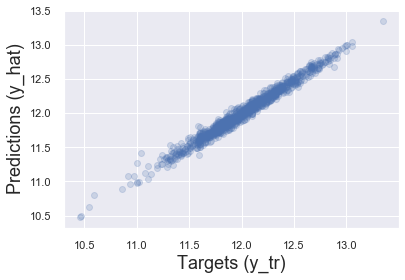

In [88]:
# 예측 된 target_label에 대한 Scatter Plot

y_hat = regressor.predict(X_tr)

plt.scatter(y_tr, y_hat, alpha = 0.2)
plt.xlabel('Targets (y_tr)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()


In [89]:
regressor.score(X_tr,y_tr)

0.9776553441543705

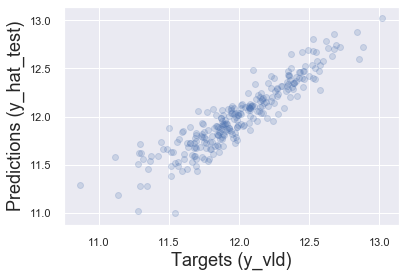

In [90]:
# validation으로 예측
y_hat_test = regressor.predict(X_vld)


plt.scatter(y_vld, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_vld)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [91]:
regressor.score(X_vld,y_vld)

0.8434289739876752

### k-fold validation(K겹 교차검증)
k=n일 때, 데이터를 n개의 부분 집합으로 분할한 후, 각 분할마다 하나의 폴드를 테스트용으로 사용하고 나머지 (n-1)개의 폴드는 훈련용으로 쓴다. 
이 과정을 반복하여 각 분할마다 정확도를 측정한다.


cross_val_score에 들어가는 매개변수는 (모델 명, 훈련데이터, 타깃, cv)인데, 여기에서 cv는 폴드(fold)수를 의미

In [92]:
# k-fold validation(K겹 교차검증)을 수행

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_tr, y = y_tr, cv = 10)

In [93]:
# 정확도를 확인

print(accuracies.mean())
print(accuracies.std())

0.8475201854015383
0.031051399409527267
